# MOVIE LENS PROJECT ANALYSIS

## 1. Prepare Problem

In [1]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# b) Load dataset
movie_data = pd.read_csv("C:\\Umaima\\Data Science\\Python\\Projects\\Projects for Submission\\Project4_Movielens\\movies.dat",
                       sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("C:\\Umaima\\Data Science\\Python\\Projects\\Projects for Submission\\Project4_Movielens\\users.dat",
                       sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("C:\\Umaima\\Data Science\\Python\\Projects\\Projects for Submission\\Project4_Movielens\\ratings.dat",
                       sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

# 2. Summarize Data

In [3]:
# a) Descriptive statistics 
# On movie_data
movie_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
movie_data.isnull().sum()
# Results show that no columns are empty or null

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
movie_data.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int32
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int32(1), object(2)
memory usage: 75.9+ KB


In [8]:
# On users data
users_data.shape

(6040, 5)

In [9]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
users_data.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int32
Gender        6040 non-null object
Age           6040 non-null int32
Occupation    6040 non-null int32
Zip-code      6040 non-null object
dtypes: int32(3), object(2)
memory usage: 165.2+ KB


In [12]:
users_data.isnull().sum()
# Results show that no columns are empty or null

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [13]:
# On Ratings data
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
ratings_data.shape

(1000209, 4)

In [15]:
ratings_data.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [16]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int32
MovieID      1000209 non-null int32
Rating       1000209 non-null int32
Timestamp    1000209 non-null object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [17]:
ratings_data.isnull().sum()
# Results show that no columns are empty or null

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

## 3. Data Visualizations

### User Age Distribution

In [18]:
age_group = users_data.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

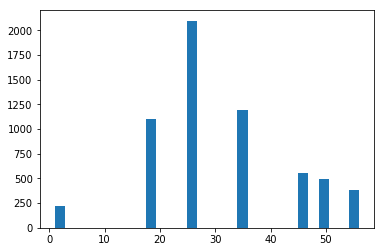

In [19]:
plt.hist(data=age_group,x=users_data.Age, bins=30)
plt.show()

#### The above age distribution shows that most of the users are 25 years old

### GenderDistribution 

In [20]:
gender_group = users_data.groupby('Gender').size()
gender_group

Gender
F    1709
M    4331
dtype: int64

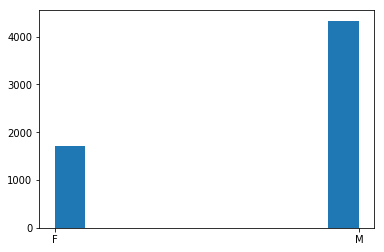

In [21]:
plt.hist(data=gender_group,x=users_data.Gender)
plt.show()

### The above distribution shows that most of the users are Males

### User Ratings

In [22]:
user_group = ratings_data.groupby(['UserID']).size()
user_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

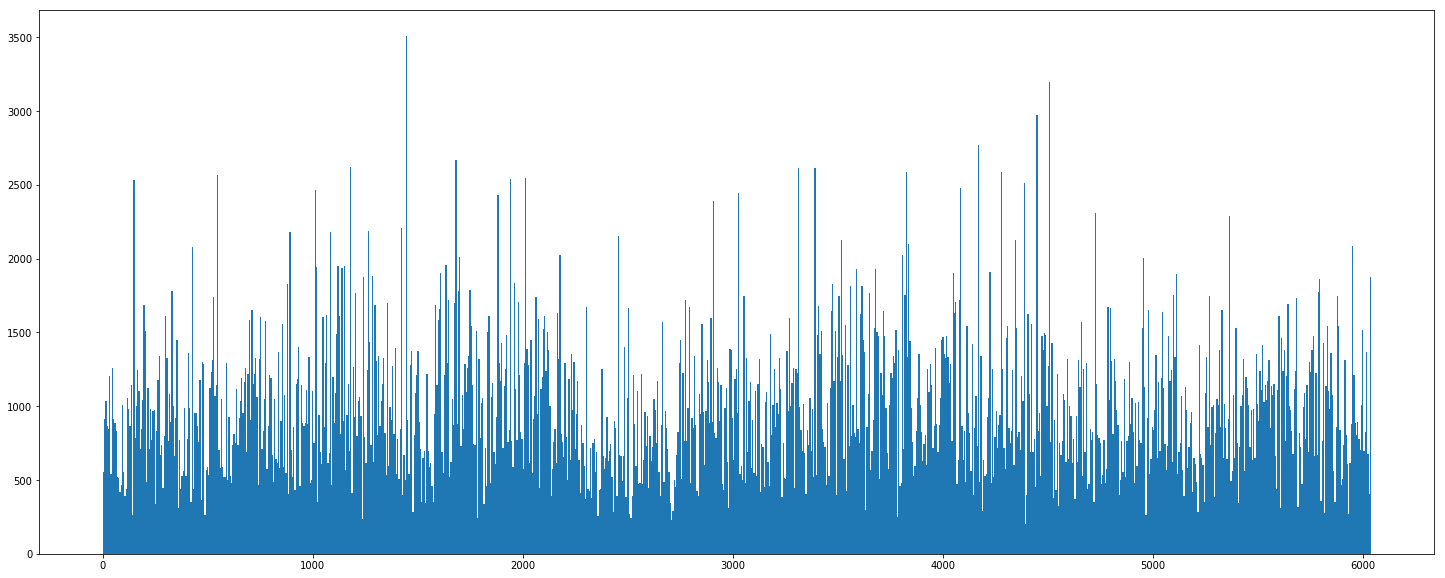

In [23]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings_data.UserID], bins=1000)
plt.show()

### Toystory data

In [24]:
toystory_data = ratings_data[ratings_data.MovieID==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [25]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [26]:
toystory_data_group = toystory_data.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

,Rating
Rating,
1,1
2,2
3,3
4,4
5,5


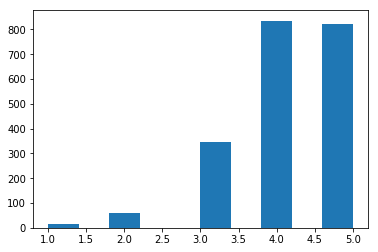

In [27]:
plt.hist(x=toystory_data['Rating'])
plt.show()

### The above plot shows that the movie 'Toystory' has got 4 **** (stars) maximum
### The average rating of this movie is 

### Viewership by Age for Toystory

In [28]:
viewership = pd.merge(ratings_data, users_data, how='left', left_on=['UserID'], right_on=['UserID'])

In [29]:
viewership.shape

(1000209, 8)

In [30]:
ratings_data.shape

(1000209, 4)

In [31]:
viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [32]:
#select only 'Toystory' data
viewership_of_toystory = viewership[viewership['MovieID'] == 1]
viewership_of_toystory.shape

(2077, 8)

In [33]:
viewership_of_toystory.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,F,1,10,48067
469,6,1,4,978237008,F,50,9,55117
581,8,1,4,978233496,M,25,12,11413
711,9,1,5,978225952,M,25,17,61614
837,10,1,5,978226474,F,35,1,95370


In [34]:
viewership_of_toystory.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

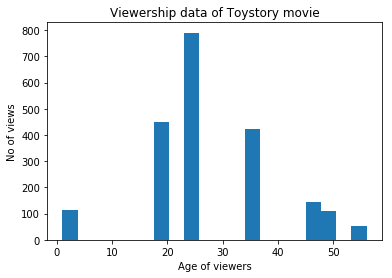

In [35]:
plt.hist(x=viewership_of_toystory['Age'], data=viewership_of_toystory, bins=20)
plt.xlabel("Age of viewers")
plt.ylabel("No of views")
plt.title("Viewership data of Toystory movie")
plt.show()

### The above plot shows that the Toystory movie is more popular for viewers between Age group 20-25 years

### Top 25 movies by viewership rating

In [36]:
movie_rating = ratings_data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [37]:
#The below list shows top 25 movies by viewership data
pd.merge(top_25_movies, movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


### Rating of userid = 2696

In [38]:
user_rating_data = ratings_data[ratings_data['UserID']==2696]
user_rating_data.head()

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


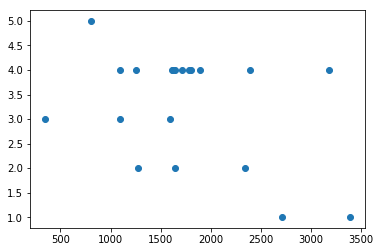

In [39]:
# plotting the above data
plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.show()

C:\Users\Umaima\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2696.0, right=2696.0
  'left=%s, right=%s') % (left, right))
C:\Users\Umaima\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2696.0, top=2696.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\Umaima\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


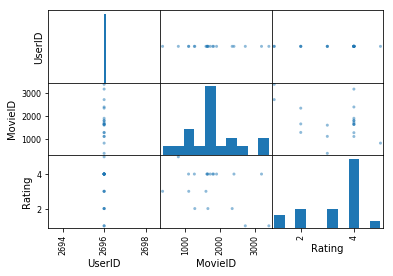

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_rating_data)
plt.show()

# 3. Prepare Data

In [43]:
few_viewership = viewership.head(500)
few_viewership.shape

(500, 8)

In [44]:
few_viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [45]:
# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(few_viewership['Age'])
x_age = le.transform(few_viewership['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [46]:
le.fit(few_viewership['Occupation'])
x_occ = le.transform(few_viewership['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5,

In [47]:
le.fit(few_viewership['MovieID'])
x_movieid = le.transform(few_viewership['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [48]:
few_viewership['New Age'] = x_age
few_viewership['New Occupation'] = x_occ
few_viewership['New MovieID'] = x_movieid

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [49]:
# Feature Selection
x_input = few_viewership[['New Age','New Occupation','New MovieID']]
y_target = few_viewership['Rating']

In [50]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,2,130
1,0,2,78
2,0,2,95
3,0,2,374
4,0,2,280


# 4. Evaluate Algorithms

In [51]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [53]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [54]:
result = logitReg.predict(x_test)

In [55]:
estimated = pd.Series(result, name='Estimated Values')

In [56]:
final_result = pd.concat([y_test, estimated], axis=1)

In [57]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.304
[[ 0  0  0  4  1]
 [ 0  0  1 13  0]
 [ 0  0 10 28  0]
 [ 0  0  9 28  2]
 [ 0  0  7 22  0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         5
          2       0.00      0.00      0.00        14
          3       0.37      0.26      0.31        38
          4       0.29      0.72      0.42        39
          5       0.00      0.00      0.00        29

avg / total       0.20      0.30      0.22       125



C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Accuracy of the above matrix is 30.4 %

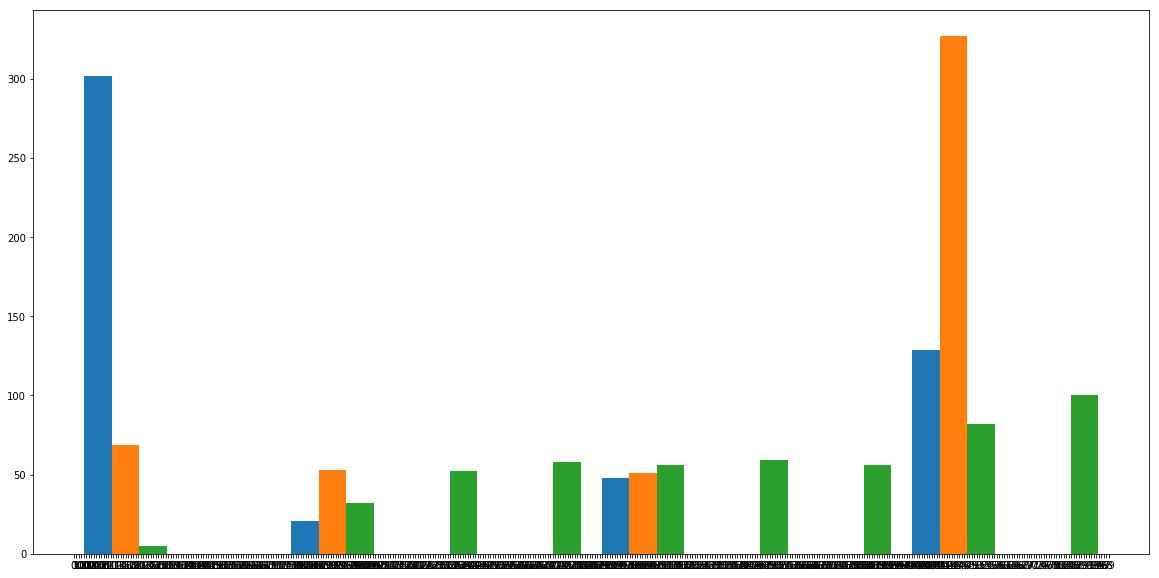

In [58]:
# Plot the histogram
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show()

In [60]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.349716 (0.074064)
LDA: 0.357895 (0.073962)
KNN: 0.295590 (0.089280)


C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


CART: 0.274680 (0.053029)
NB: 0.371124 (0.076266)
SVM: 0.309175 (0.068645)


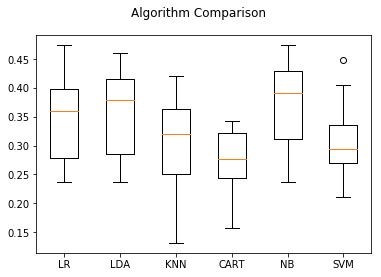

In [62]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### From the above plot we see that Naive Bayes gives the most accurate results